https://morvanzhou.github.io/tutorials/machine-learning/torch/3-06-optimizer/

# 要点

这节主要是用Torch时间优化器中提到的几种优化器。

下图是这节内容对比各种优化器的效果

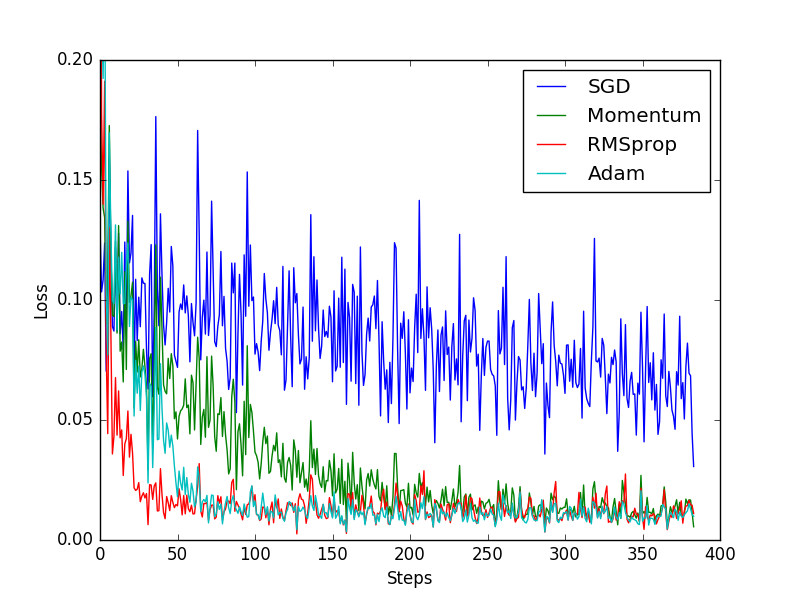

# 伪数据

为了对比各种优化器的效果，我们需要一些数据，我们自己编一些伪数据如下：

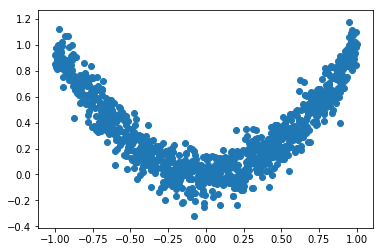

In [1]:
%matplotlib inline
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

torch.manual_seed(1)  #reproducible

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

#fake dataset
x = torch.unsqueeze(torch.linspace(-1,1,1000),dim=1)
y = x.pow(2)+0.1*torch.normal(torch.zeros(*x.size()))

#plot dataset
plt.scatter(x.numpy(),y.numpy())
plt.show()

#使用上一节内容提到的data loader
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2,
)

# 每个优化器优化一个神经网络

为了对比每一种优化器，我们给他们各自创建一个神经网络，但是这个神经网络都来自同一个`Net`形式。

In [2]:
#默认的network形式
class Net(torch.nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.hidden=torch.nn.Linear(1,20) #hidden layer
        self.predict=torch.nn.Linear(20,1) #output layer
        
    def forward(self,x):
        x=F.relu(self.hidden(x)) #activation function for hidden layer
        x=self.predict(x)  #linear output
        return x
    
#为每个优化器创建一个net
net_SGD=Net()
net_Momentum=Net()
net_RMSprop=Net()
net_Adam=Net()
nets=[net_SGD,net_Momentum,net_RMSprop,net_Adam]

# 优化器 Optimizer

接下来再创建不同的优化器，用来训练不同的网络，并创建一个`loss_func`用来计算误差，我们用几种常见的优化器，`SGD`，`Momentum`，`RMSprop`，`Adam`。

In [3]:
#different optimizers
opt_SGD=torch.optim.SGD(net_SGD.parameters(),lr=LR)
opt_Momentum=torch.optim.SGD(net_Momentum.parameters(),lr=LR,momentum=0.8)
opt_RMSprop=torch.optim.RMSprop(net_RMSprop.parameters(),lr=LR,alpha=0.9)
opt_Adam=torch.optim.Adam(net_Adam.parameters(),lr=LR,betas=(0.9,0.99))
optimizer=[opt_SGD,opt_Momentum,opt_RMSprop,opt_Adam]

loss_func=torch.nn.MSELoss()
losses_his=[[],[],[],[]] #记录training时不同神经网络的loss

# 训练/出图

接下来训练和loss画图

In [4]:
for epoch in range(EPOCH):
    print('Epoch:',epoch)
    for step,(b_x,b_y) in enumerate(loader):
        #对每个优化器，优化属于他的神经网络
        for net,opt,l_his in zip(nets,optimizer,losses_his):
            output=net(b_x) #get output for every net
            loss=loss_func(output,b_y) #compute loss for every net
            opt.zero_grad() # clear gradients for next train
            loss.backward() # backpropagation, compute gradients
            opt.step() #apply gradients
            l_his.append(loss.data.numpy()) # loss recoder

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


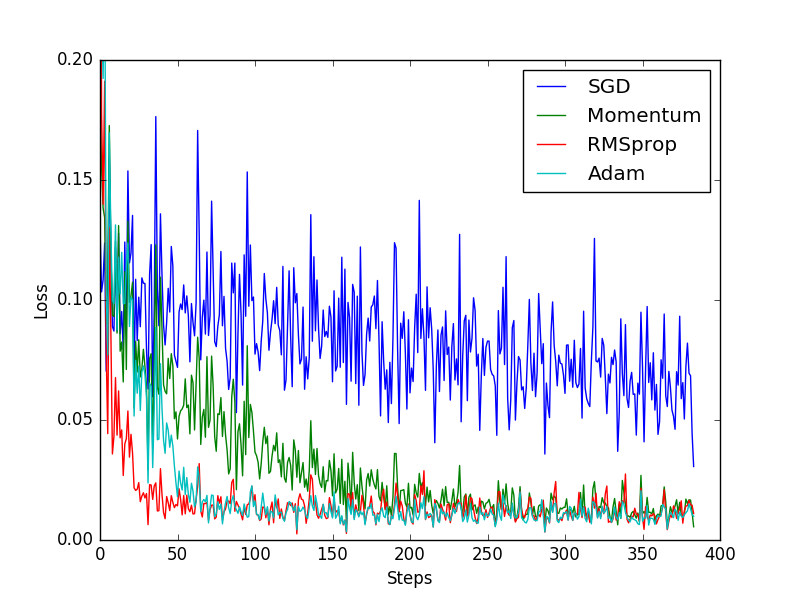

`SGD`是最普通的优化器，也可以说没有加速效果，而`Momentum`是`SGD`的改良版，它加入了动量原则。后面的`RMSprop`又是`Momentum`的升级版。而`Adam`又是`RMSprop`的升级版。不过这个解雇中我们可以看到，`Adam`的效果似乎比`RMSprop`要差一点。所以说并不是越先进的优化器结果越佳。我们在自己的试验中可以尝试不同的优化器，找到那个最适合你的数据/网络优化器。

# 完整的代码

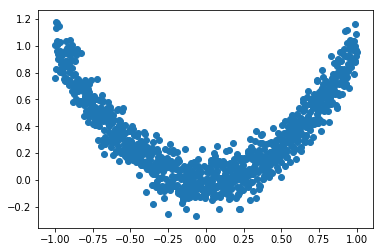

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11


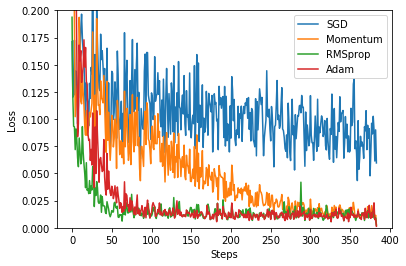

In [5]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# fake dataset
x = torch.unsqueeze(torch.linspace(-1, 1, 1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

# put dateset into torch dataset
torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)


# default network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

if __name__ == '__main__':
    # different nets
    net_SGD         = Net()
    net_Momentum    = Net()
    net_RMSprop     = Net()
    net_Adam        = Net()
    nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

    # different optimizers
    opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
    opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
    opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
    opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
    optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

    loss_func = torch.nn.MSELoss()
    losses_his = [[], [], [], []]   # record loss

    # training
    for epoch in range(EPOCH):
        print('Epoch: ', epoch)
        for step, (b_x, b_y) in enumerate(loader):          # for each training step
            for net, opt, l_his in zip(nets, optimizers, losses_his):
                output = net(b_x)              # get output for every net
                loss = loss_func(output, b_y)  # compute loss for every net
                opt.zero_grad()                # clear gradients for next train
                loss.backward()                # backpropagation, compute gradients
                opt.step()                     # apply gradients
                l_his.append(loss.data.numpy())     # loss recoder

    labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
    for i, l_his in enumerate(losses_his):
        plt.plot(l_his, label=labels[i])
    plt.legend(loc='best')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.ylim((0, 0.2))
    plt.show()